# Diabetes Prediction

In this project, I am going to use the Diebetes dataset from the Vanderbilt Biostatistics Datasets to build Predictive models to classify the diagnosis of diabetes. Logistic Regression, Random Forest, and Gradient Boosting will be used to build the Binary Classification predictive tools. The dataset contains the following features/values.

<img src="nhgh_labels.png" width="400" height="300">

In [3]:
#Setup
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import brier_score_loss
!conda install -c "conda-forge/label/gcc7" xgboost -- y
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

!conda config --add channels conda-forge


Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - y

Current channels:

  - https://conda.anaconda.org/conda-forge/label/gcc7/osx-64
  - https://conda.anaconda.org/conda-forge/label/gcc7/noarch
  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
!conda create --name imblearn_env python=3.8 -- y
!conda activate imblearn_env
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, ADASYN

Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - y

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update'

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# Define a custom transformer class for ADASYN
class ADASYNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=None, sampling_strategy=1.0):
        self.adasyn = ADASYN(random_state=random_state, sampling_strategy=sampling_strategy)

    def fit(self, X, y):
        X_resampled, y_resampled = self.adasyn.fit_resample(X, y)
        return X_resampled, y_resampled

    def transform(self, X):
        return X

In [8]:
df = pd.read_csv('/Users/asamitakeuchi/healthcare/nhgh.tsv', sep='\t')
df.head()

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


In [9]:
df.shape

(6795, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     6795 non-null   int64  
 1   sex      6795 non-null   object 
 2   age      6795 non-null   float64
 3   re       6795 non-null   object 
 4   income   6475 non-null   object 
 5   tx       6795 non-null   int64  
 6   dx       6795 non-null   int64  
 7   wt       6795 non-null   float64
 8   ht       6795 non-null   float64
 9   bmi      6795 non-null   float64
 10  leg      6564 non-null   float64
 11  arml     6616 non-null   float64
 12  armc     6607 non-null   float64
 13  waist    6556 non-null   float64
 14  tri      6314 non-null   float64
 15  sub      5824 non-null   float64
 16  gh       6795 non-null   float64
 17  albumin  6706 non-null   float64
 18  bun      6706 non-null   float64
 19  SCr      6706 non-null   float64
dtypes: float64(14), int64(3), object(3)
memory usage: 1.

In [11]:
def check_null(df):
    total_n = df.shape[0]
    n_of_null = df.isnull().sum()
    percent_null = (n_of_null/total_n) * 100
    null_summary = pd.DataFrame({
        'Feature': percent_null.index,
        'null count': n_of_null.values,
        '%null': percent_null.values
    })
    return null_summary

check_null(df)

,Feature,null count,%null
0,seqn,0,0.000000
1,sex,0,0.000000
2,age,0,0.000000
3,re,0,0.000000
4,income,320,4.709345
5,tx,0,0.000000
6,dx,0,0.000000
7,wt,0,0.000000
8,ht,0,0.000000
9,bmi,0,0.000000


In [12]:
#impute missing values with mean
#I will replace 'albumin', 'bun','Scr' with 0
#And 'income' with 'Missing'
columns_to_impute = ['income', 'leg', 'arml', 'armc','waist','tri','sub']
df[columns_to_impute] = df[columns_to_impute].fillna(df[columns_to_impute].mean())
columns_to_zero = ['albumin', 'bun','SCr']
df[columns_to_zero] = df[columns_to_zero].fillna(0)
df['income'] = df['income'].fillna('Missing')
print("\nDataFrame with Missing Values Imputed:")
print(df)


DataFrame with Missing Values Imputed:
       seqn     sex        age                  re         income  tx  dx  \
0     51624    male  34.166667  Non-Hispanic White  [25000,35000)   0   0   
1     51626    male  16.833333  Non-Hispanic Black  [45000,55000)   0   0   
2     51628  female  60.166667  Non-Hispanic Black  [10000,15000)   1   1   
3     51629    male  26.083333    Mexican American  [25000,35000)   0   0   
4     51630  female  49.666667  Non-Hispanic White  [35000,45000)   0   0   
...     ...     ...        ...                 ...            ...  ..  ..   
6790  62155    male  33.000000    Mexican American  [35000,45000)   0   0   
6791  62156  female  48.916667  Non-Hispanic White       [0,5000)   0   1   
6792  62157    male  27.500000      Other Hispanic  [35000,45000)   0   0   
6793  62158    male  75.750000  Non-Hispanic Black  [10000,15000)   0   0   
6794  62160  female  63.583333      Other Hispanic        Missing   1   1   

         wt     ht    bmi   leg  ar

In [13]:
df.isnull().sum()

seqn       0
sex        0
age        0
re         0
income     0
tx         0
dx         0
wt         0
ht         0
bmi        0
leg        0
arml       0
armc       0
waist      0
tri        0
sub        0
gh         0
albumin    0
bun        0
SCr        0
dtype: int64

According to CDC (https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html), 
Glycohemoglobin level below 5.7 % is classified as 'Normal', between 5.7% and 6.4% is 'Prediabetes', and 6.5% or above is 'Diabetes'. Here, I am going to cerate a column 'diabetes' and classify gh 6.5 amd above as 1, below 6.4 as 0.

In [14]:
def classify_diabetes(gh_level):
    if gh_level >= 6.5:
        return 1
    else:
        return 0
    
df['diabetes'] = df['gh'].apply(classify_diabetes)
df[:5]

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,...,arml,armc,waist,tri,sub,gh,albumin,bun,SCr,diabetes
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,...,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94,0
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,...,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89,0
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,...,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11,0
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,...,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80,0
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,...,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79,0


In [15]:
n_diabetes = df['diabetes'].value_counts()
percent_diabetes = (n_diabetes/n_diabetes.sum())*100
print(n_diabetes, percent_diabetes)

0    6167
1     628
Name: diabetes, dtype: int64 0    90.75791
1     9.24209
Name: diabetes, dtype: float64


There is a classe imbalance here: no diabetes - 90.8% and with diabetes - 9.2%

In [16]:
df['income'].value_counts()

>= 100000         877
[25000,35000)     845
[35000,45000)     610
[75000,100000)    564
[20000,25000)     563
[10000,15000)     531
[45000,55000)     522
[15000,20000)     456
[55000,65000)     376
Missing           320
[5000,10000)      315
[65000,75000)     274
[0,5000)          235
> 20000           232
< 20000            75
Name: income, dtype: int64

In [17]:
df['income'].describe()

count          6795
unique           15
top       >= 100000
freq            877
Name: income, dtype: object

## Exploratory Data Analysis

In [18]:
#Summary statistics
df.describe()

,seqn,age,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr,diabetes
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000
mean,56872.080500,44.285700,0.091832,0.134511,79.370625,167.042958,28.321741,38.409324,36.874607,32.485152,96.254149,18.787726,19.961556,5.676586,4.217645,12.748492,0.867118,0.092421
std,3043.535776,20.594593,0.288810,0.341225,21.930903,10.264984,6.950110,3.810424,2.744729,5.223849,16.756452,8.019491,7.747980,0.964700,0.584254,5.866827,0.453454,0.289641
min,51624.000000,12.000000,0.000000,0.000000,28.000000,123.300000,13.180000,20.400000,24.800000,16.800000,52.000000,2.600000,3.800000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,54245.500000,25.666667,0.000000,0.000000,64.000000,159.600000,23.430000,36.000000,35.000000,29.000000,84.000000,12.400000,14.000000,5.200000,4.100000,9.000000,0.690000,0.000000
50%,56873.000000,43.750000,0.000000,0.000000,76.300000,166.600000,27.290000,38.409324,36.874607,32.300000,96.100000,18.787726,19.961556,5.500000,4.300000,12.000000,0.820000,0.000000
75%,59510.500000,61.333333,0.000000,0.000000,91.100000,174.500000,31.880000,41.000000,38.700000,35.500000,106.400000,24.300000,25.000000,5.800000,4.500000,15.000000,0.980000,0.000000
max,62160.000000,80.000000,1.000000,1.000000,239.400000,202.700000,84.870000,50.600000,47.000000,61.000000,179.000000,41.100000,40.400000,16.400000,5.300000,90.000000,15.660000,1.000000


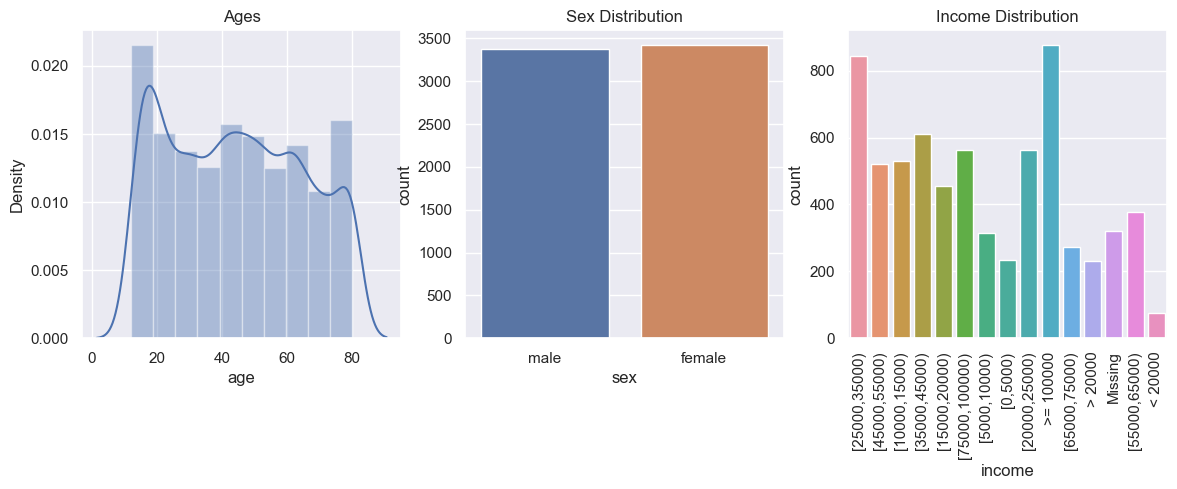

In [15]:
#What are % of age, sex, income, re?
# Create a new figure
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(131)  # 1 row, 3 columns, 1st subplot
sns.distplot(df['age'], ax=ax1, bins=10)
ax1.set_title('Ages')

ax2 = plt.subplot(132)  # 1 row, 3 columns, 1st subplot
sns.countplot(x='sex', data=df, ax=ax2)
ax2.set_title('Sex Distribution')

ax3 = plt.subplot(133)  # 1 row, 3 columns, 1st subplot
sns.countplot(x='income', data=df, ax=ax3)
ax3.set_title('Income Distribution')
plt.xticks(rotation=90)

# Display the figure
plt.show()

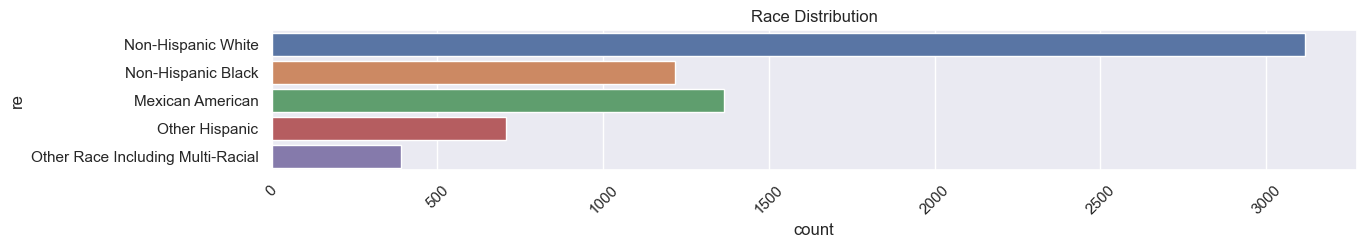

In [15]:
plt.figure(figsize=(14, 4))
ax4 = plt.subplot(211)  # 1 row, 3 columns, 1st subplot
sns.countplot(y='re', data=df, ax=ax4)
ax4.set_title('Race Distribution')
plt.xticks(rotation=45)

# Display the figure
plt.show()

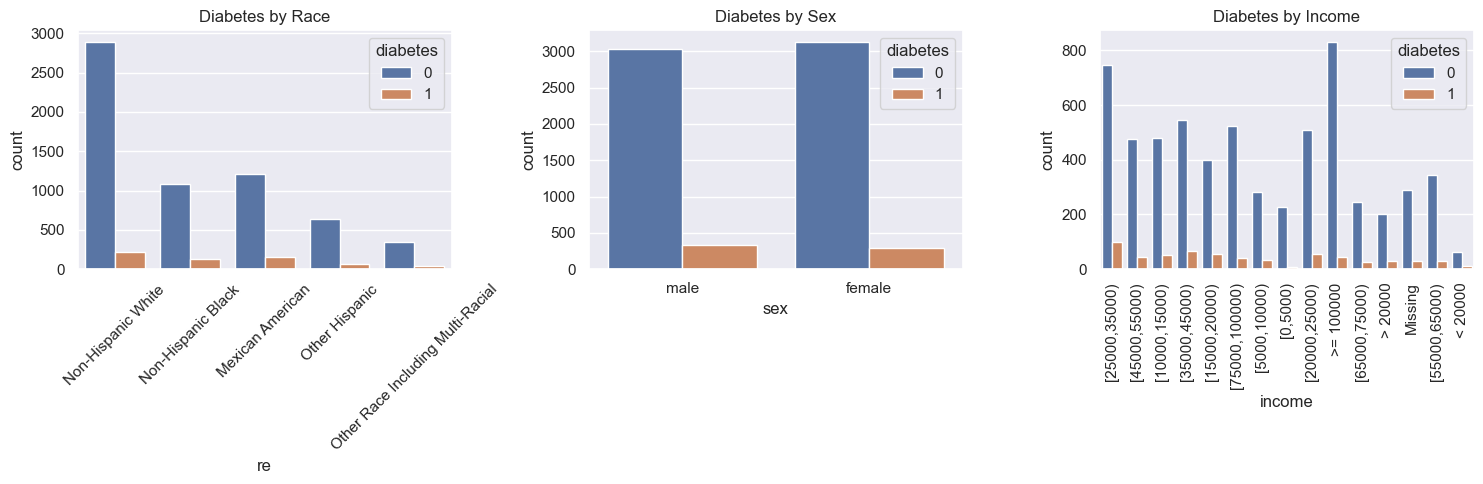

In [16]:
#How are the gh level by re(race), sex, and income?
plt.figure(figsize=(15, 5))
plt.subplot(131)  # 1 row, 3 columns, 1st subplot
sns.countplot(x='re', hue='diabetes', data=df)
plt.title('Diabetes by Race')
plt.xticks(rotation=45)

# Create a count plot for diabetes by sex
plt.subplot(132)  # 1 row, 3 columns, 2nd subplot
sns.countplot(x='sex', hue='diabetes', data=df)
plt.title('Diabetes by Sex')

# Create a count plot for diabetes by income
plt.subplot(133)  # 1 row, 3 columns, 3rd subplot
sns.countplot(x='income', hue='diabetes', data=df)
plt.title('Diabetes by Income')
plt.xticks(rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

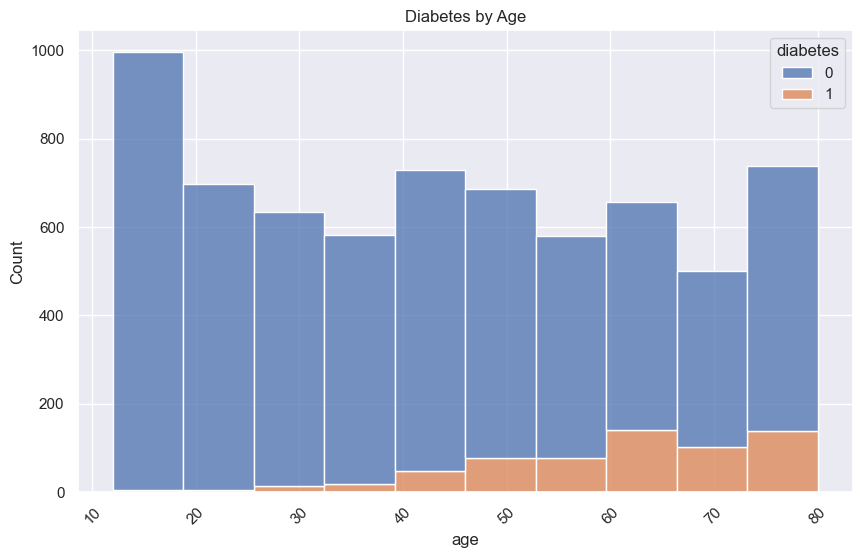

In [17]:
#How are the gh level by age?
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=10)
plt.title('Diabetes by Age')
plt.xticks(rotation=45)

(array([ 25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

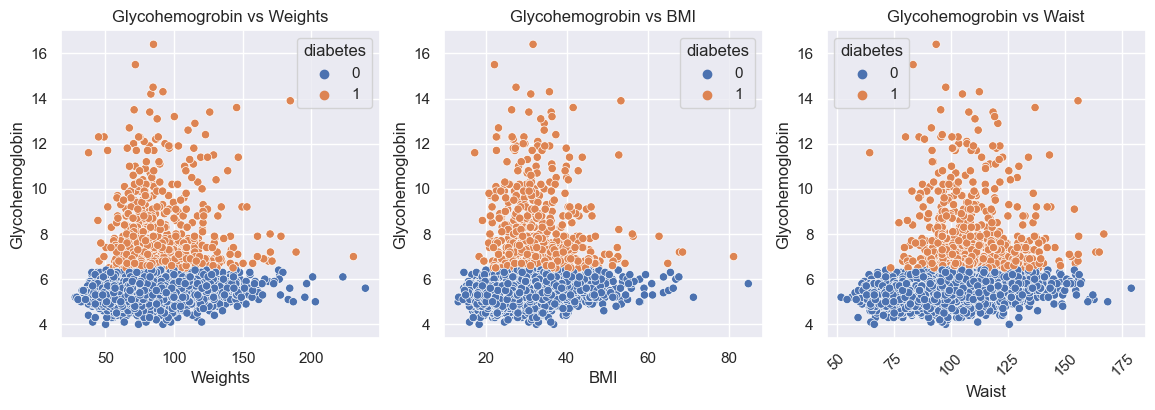

In [27]:
#Scatterplot of gh and wt, bmi, and waist
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(131)  # 1 row, 3 columns, 1st subplot
sns.scatterplot(data=df, x=df['wt'], y=df['gh'],ax=ax1, hue=df['diabetes'])
ax1.set_title('Glycohemogrobin vs Weights')
ax1.set_xlabel('Weights')
ax1.set_ylabel('Glycohemoglobin')

ax2 = plt.subplot(132)  # 1 row, 3 columns, 1st subplot
sns.scatterplot(data=df, x=df['bmi'], y=df['gh'], ax=ax2, hue=df['diabetes'])
ax2.set_title('Glycohemogrobin vs BMI')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Glycohemoglobin')

ax3 = plt.subplot(133)
sns.scatterplot(data=df, x=df['waist'], y=df['gh'],ax=ax3, hue=df['diabetes'])
plt.title('Glycohemogrobin vs Waist')
ax3.set_xlabel('Waist')
ax3.set_ylabel('Glycohemoglobin')
plt.xticks(rotation=45)

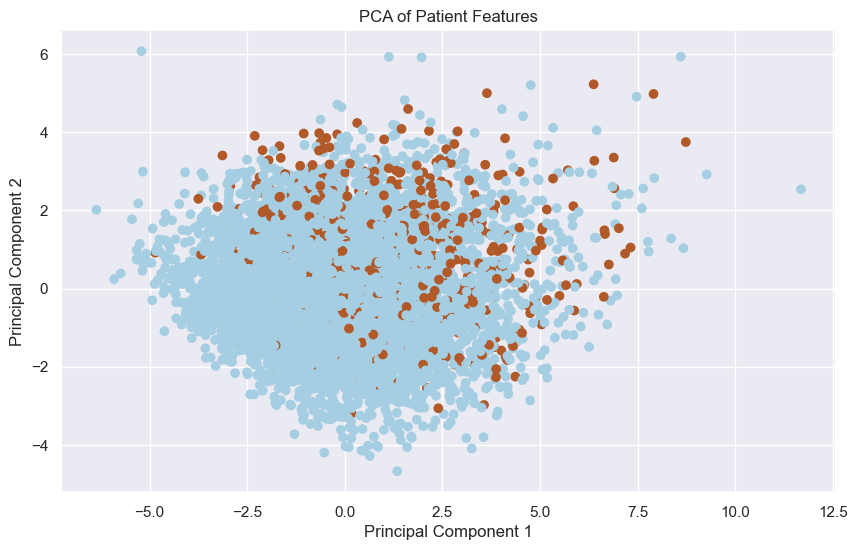

In [18]:
#Visualizing the wt, ht, bmi, leg, arml, armc, and waist using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Create a matrix of your numeric features
# Replace this with your actual data
data_matrix = df[['wt', 'ht', 'bmi', 'leg', 'arml', 'armc', 'waist']]

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_matrix_scaled = scaler.fit_transform(data_matrix)

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(data_matrix_scaled)

# Create a scatter plot of the first two principal components
diabetes = df['diabetes']

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=diabetes, cmap='Paired')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Patient Features')
plt.grid(True)
plt.show()

# Feature Engineering

I am goign to use the following encoding/engineering for the features:

- Binary encoding for sex
- One-hot encoing for re and income

In [19]:
#Binary encoding
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'male' else 1)

In [20]:
#One-hot encoding
df_encoded = pd.get_dummies(df, columns = ['re', 'income'])
print(df_encoded)

       seqn  sex        age  tx  dx     wt     ht    bmi   leg  arml  ...  \
0     51624    0  34.166667   0   0   87.4  164.7  32.22  41.5  40.0  ...   
1     51626    0  16.833333   0   0   72.3  181.3  22.00  42.0  39.5  ...   
2     51628    1  60.166667   1   1  116.8  166.0  42.39  35.3  39.0  ...   
3     51629    0  26.083333   0   0   97.6  173.0  32.61  41.7  38.7  ...   
4     51630    1  49.666667   0   0   86.7  168.4  30.57  37.5  36.1  ...   
...     ...  ...        ...  ..  ..    ...    ...    ...   ...   ...  ...   
6790  62155    0  33.000000   0   0   94.3  163.5  35.28  34.4  34.7  ...   
6791  62156    1  48.916667   0   1   87.1  156.9  35.38  33.9  34.5  ...   
6792  62157    0  27.500000   0   0   57.0  164.3  21.12  35.3  33.7  ...   
6793  62158    0  75.750000   0   0   75.1  162.7  28.37  38.6  36.8  ...   
6794  62160    1  63.583333   1   1   71.3  157.3  28.82  31.4  33.0  ...   

      income_[10000,15000)  income_[15000,20000)  income_[20000,25000)  \
0

# Build models

In [21]:
#Split train and test set
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded.diabetes
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, random_state=42)

## Feature Importance

I am checking the feature importances by Random Forest

In [18]:
# feature importance
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

['Variable: gh                   Importance: 0.6103567608175849',
 'Variable: tx                   Importance: 0.12651793480280357',
 'Variable: dx                   Importance: 0.07169571536814523',
 'Variable: waist                Importance: 0.02391654023017693',
 'Variable: age                  Importance: 0.021952366681734222',
 'Variable: bmi                  Importance: 0.013693629799944103',
 'Variable: wt                   Importance: 0.011915240563466689',
 'Variable: leg                  Importance: 0.011796861122562563',
 'Variable: SCr                  Importance: 0.011747481186315658',
 'Variable: bun                  Importance: 0.011118915730498715',
 'Variable: armc                 Importance: 0.01043056164357102',
 'Variable: sub                  Importance: 0.01002572092680026',
 'Variable: albumin              Importance: 0.009959254836709591',
 'Variable: ht                   Importance: 0.00917096068831067',
 'Variable: tri                  Importance: 0.008825422

## Oversampling
As I mentioned in the forst section, the data has a significant class imbalance where 90.8% has no diabetes while only 9.2% has diabetes. I am going to use oversampling to address this issue.

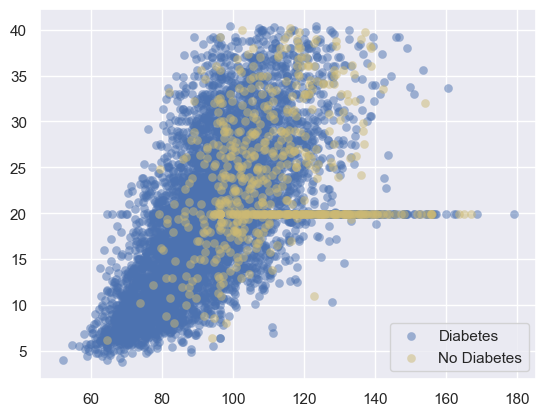

In [22]:
# original dataset
def plot_data(X, y):
    plt.scatter(X[y == 0, 11], X[y == 0, 13], label="Diabetes", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 11], X[y == 1, 13], label="No Diabetes", alpha=0.5, linewidth=0.15, c='y')
    plt.legend()
    return plt.show()

X_values = X.values
y_values = y.values

# Plot our data by running our plot data function on X and y
plot_data(X_values, y_values)

In [31]:
#Plotting after oversampling
# Resampling method
resampling = ADASYN(random_state=42, sampling_strategy=1.0)
y = y.astype('int32')
# Create the resampled feature set
X_resampled, y_resampled = resampling.fit_resample(X, y)


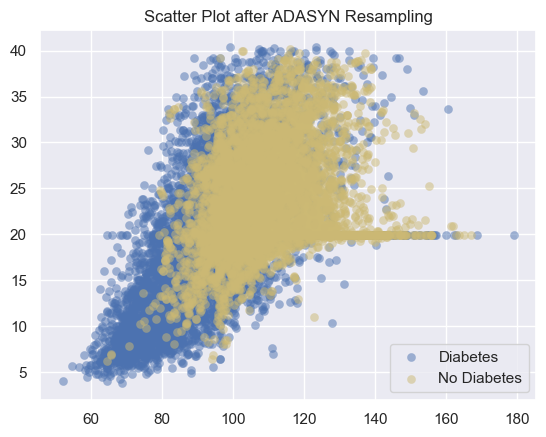

In [32]:
# Modify the plot_data function to accept X and y
def plot_data(X, y):
    plt.scatter(X[y == 0, 11], X[y == 0, 13], label="Diabetes", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 11], X[y == 1, 13], label="No Diabetes", alpha=0.5, linewidth=0.15, c='y')
    plt.legend()
    plt.title("Scatter Plot after ADASYN Resampling")  # Add a title
    return plt.show()

# Your resampling code
resampling = ADASYN(random_state=42, sampling_strategy=1.0)
y = y.astype('int32')
X_resampled, y_resampled = resampling.fit_resample(X, y)

x_v = X_resampled.values
y_v = y_resampled.values

# Plot the data after resampling
plot_data(x_v, y_v)

In [33]:
resampling = ADASYN(random_state=42, sampling_strategy=1.0)
y = y.astype('int32')
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12302 entries, 0 to 12301
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   seqn                                  12302 non-null  int64  
 1   sex                                   12302 non-null  int64  
 2   age                                   12302 non-null  float64
 3   tx                                    12302 non-null  int64  
 4   dx                                    12302 non-null  int64  
 5   wt                                    12302 non-null  float64
 6   ht                                    12302 non-null  float64
 7   bmi                                   12302 non-null  float64
 8   leg                                   12302 non-null  float64
 9   arml                                  12302 non-null  float64
 10  armc                                  12302 non-null  float64
 11  waist          

In [34]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,
                                                    test_size=.2, random_state=42)

## Build Model

I am going to use three models to predict the diabetes: Logistic regression, Random Forest, and XG Boost.
I'm going to use Brier Score for the assessment of the model performance. Brier score is a metric used to assess the accuracy of probabilistic predictions made by a model. It typically ranges from 0 to 1, with lower values indicating better performance. A perfect model that makes accurate probabilistic predictions would have a Brier score of 0, whereas a completely random or uninformative model would have a Brier score of 0.25 for binary classification tasks (where there are two classes).

The formula:

<img src="brier_score.png" width="300" height="150">

### Logistic Regression

In [35]:
# Standardize the data
scaler = StandardScaler()
# PCA
pca = PCA(n_components = 7, random_state = 42)
# build the model
logistic = LogisticRegression(random_state = 42)
# build the pipeline
pipeline = Pipeline([('scaler', scaler), ('PCA', pca), ('classifier', logistic)])
# cv
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state = 42)
# param grid
random_grid = {'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : np.logspace(-4, 4, 20)}
# random search
model = RandomizedSearchCV(pipeline, param_distributions = random_grid, scoring = 'f1', cv = kfold, n_iter = 100, n_jobs=-1, random_state =42)
# fit on training data
model = model.fit(X_train_resampled, y_train_resampled)
# brier score
y_proba = model.predict_proba(X_test_resampled)
score1 = brier_score_loss(y_test_resampled, y_proba[:, 1])

In [36]:
print(f'Brier score of Logistic regression: {score1}')

Brier score of Logistic regression: 0.045775191908331264


### Random Forest

In [37]:
#Random forest model
rf = RandomForestClassifier(random_state = 42)
# build the pipeline
pipeline2 = Pipeline([('scaler', scaler), ('PCA', pca), ('classifier', rf)])
# param grid
random_grid2 = {'classifier__n_estimators': stats.randint(500, 1000),
               'classifier__max_features': ['auto', 'sqrt'],
               'classifier__max_depth': stats.randint(3, 6),
               'classifier__min_samples_split': stats.randint(2, 10),
               'classifier__min_samples_leaf': stats.randint(1, 5)}
# random search
model2 = RandomizedSearchCV(pipeline2, param_distributions = random_grid2, scoring = 'f1', cv = kfold, n_iter = 100, n_jobs=-1, random_state =42)
# fit on training data
model2 = model2.fit(X_train_resampled, y_train_resampled)
# brier score
y_proba2 = model2.predict_proba(X_test_resampled)
score2 = brier_score_loss(y_test_resampled, y_proba2[:, 1])
score2

0.07184990225078539

In [38]:
print(f'Brier score of Random Forest: {score2}')

Brier score of Random Forest: 0.07184990225078539


## Gradient Boosting

In [39]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
#GradientBoosting model
gd = GradientBoostingClassifier(random_state = 42)
# build the pipeline
pipeline4 = Pipeline([('scaler', scaler), ('PCA', pca), ('classifier', gd)])
# param grid
random_grid4 = {'classifier__n_estimators': stats.randint(500, 1000),
               'classifier__max_features': ['log2', 'sqrt'],
               'classifier__max_depth': stats.randint(3, 6),
               'classifier__min_samples_split': stats.randint(2, 10),
               'classifier__min_samples_leaf': stats.randint(1, 5)}
# random search
model4 = RandomizedSearchCV(pipeline4, param_distributions = random_grid4, scoring = 'f1', cv = kfold, n_iter = 100, n_jobs=-1, random_state =42)
# fit on training data
model4 = model4.fit(X_train_resampled, y_train_resampled)
# brier score
y_proba4 = model4.predict_proba(X_test_resampled)
score4 = brier_score_loss(y_test_resampled, y_proba4[:, 1])
score4

0.03189263144999795

In [40]:
print(f'Brier score of Gradient Boosting: {score4}')

Brier score of Gradient Boosting: 0.03189263144999795


In [41]:
print(f'Brier score of Logistic regression: {score1}')
print(f'Brier score of Random Forest: {score2}')
print(f'Brier score of Gradient Boosting: {score4}')

Brier score of Logistic regression: 0.045775191908331264
Brier score of Random Forest: 0.07184990225078539
Brier score of Gradient Boosting: 0.03189263144999795


--> Gradient Boosting has the best score